In [1]:
import os
import pickle

import cv2
from tqdm import tqdm
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [4]:
TEST_PREDICTIONS_FILENAME = "../runs/resnet_100_v1/imagenet_v1_test_predictions.pkl"
NUM_IMAGES_TO_SHOW = 16
NUM_COLS = 4
NUM_ROWS = NUM_IMAGES_TO_SHOW // NUM_COLS + int(NUM_IMAGES_TO_SHOW % NUM_COLS != 0)

In [5]:
with open(TEST_PREDICTIONS_FILENAME, "rb") as fp:
    results = pickle.load(fp)
image_names = results["image_names"]
landmarks = results["landmarks"]
    
print("Images:", len(image_names))
print("Landmarks shape:", landmarks.shape)

if len(image_names) < NUM_IMAGES_TO_SHOW:
    raise RuntimeError(f"Choose less images to show, you have only {len(image_names)}")

Images: 16000
Landmarks shape: (16000, 971, 2)


In [6]:
def draw_landmarks(image, landmarks):
    for point in landmarks:
        x, y = point.astype(int)
        cv2.circle(image, (x, y), 1, (128, 0, 0), 1, -1)
    return image

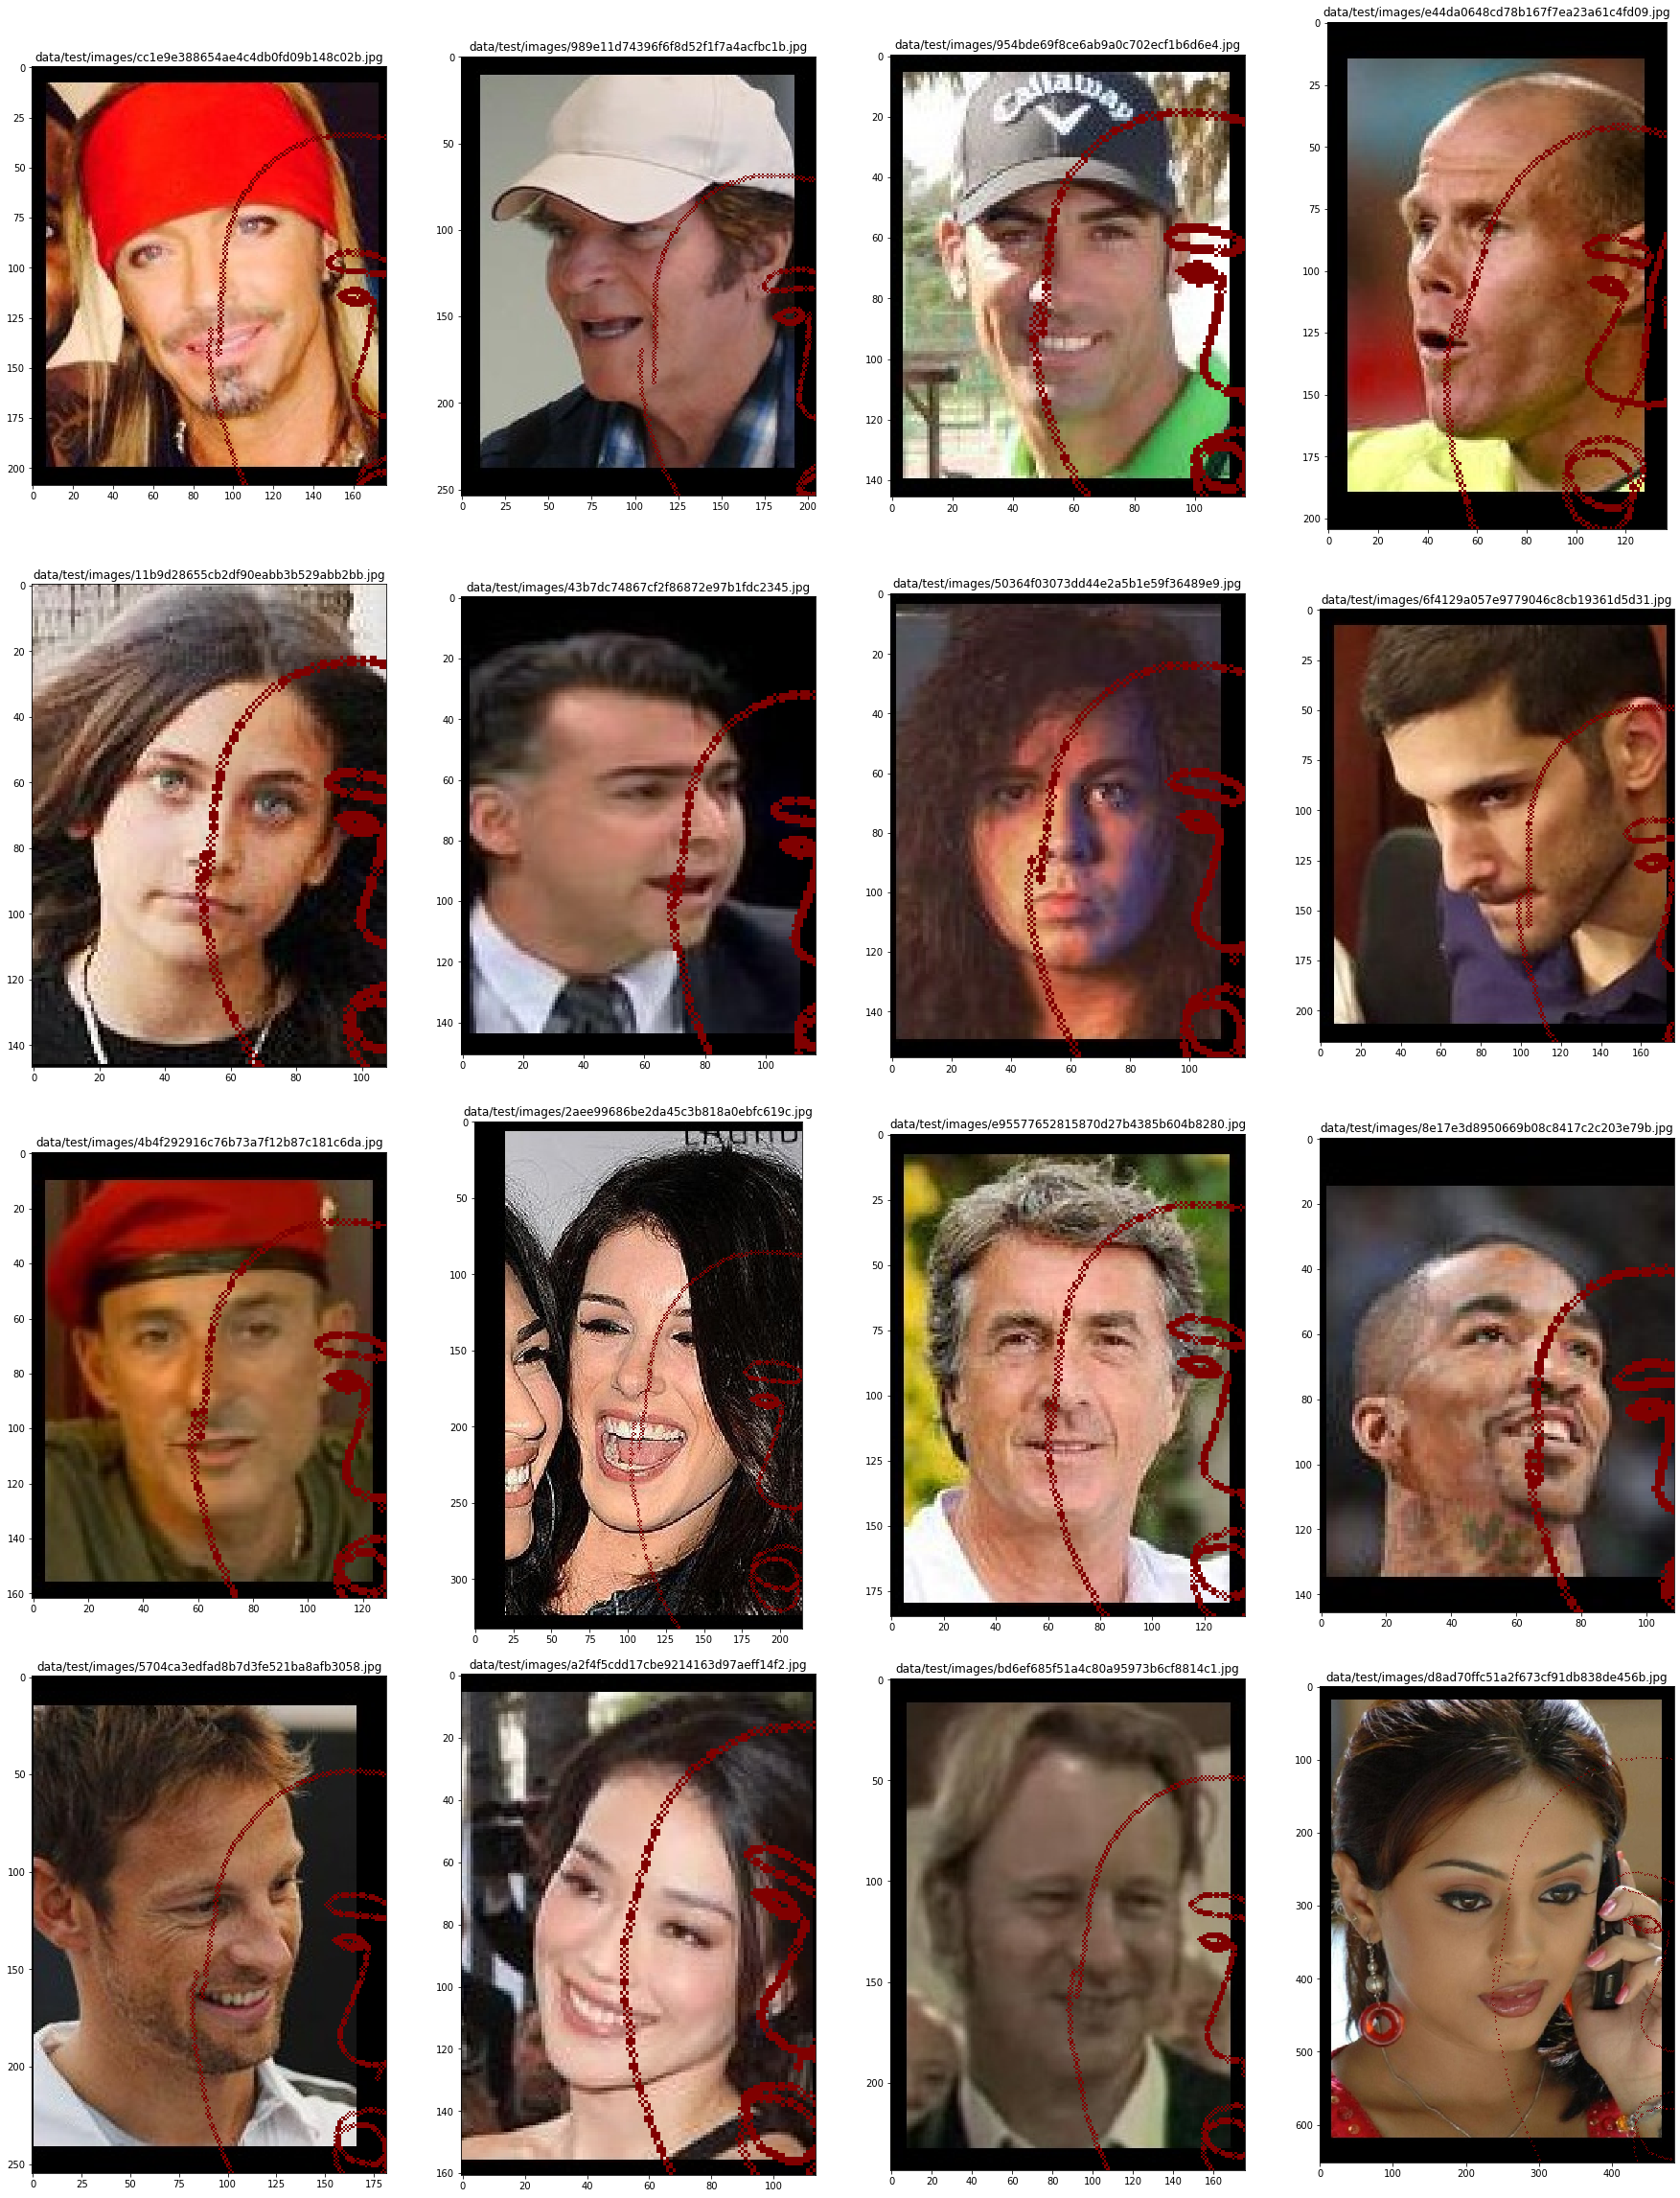

In [7]:
random_idxs = np.random.choice(len(image_names), size=min(NUM_IMAGES_TO_SHOW, len(image_names)), replace=False)

plt.figure(figsize=(25, NUM_ROWS * 8))
for i, idx in enumerate(random_idxs, 1):
    image = cv2.imread('../' + image_names[idx])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = draw_landmarks(image, landmarks[idx])
    
    plt.subplot(NUM_ROWS, NUM_COLS, i)
    plt.imshow(image)
    plt.title(image_names[idx])
    
plt.tight_layout()
plt.show()